# Movie recommendation system using Collaborative Filtering

In [1]:
# !pip install scikit-surprise
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate


In [2]:
df = pd.read_csv("ml-latest-small/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df.shape

(100836, 4)

In [4]:
df.drop('timestamp', axis = 1, inplace = True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

## Exloratory Data Analysis

**Check number of movies per user**

In [6]:
n_movies = df['movieId'].nunique()
n_users = df['userId'].nunique()
print(f'Number of unique movies: {n_movies}')
print(f'Number of unique users: {n_users}')

Number of unique movies: 9724
Number of unique users: 610


**Sparsity of the data**

In [7]:
available_rating = df['rating'].count()
total_rating = n_movies * n_users
missing_rating = total_rating - available_rating
sparsity = (missing_rating / total_rating)*100
print(f'Sparsity: {sparsity}')

Sparsity: 98.30003169443864


**Checking the Rating distribution**

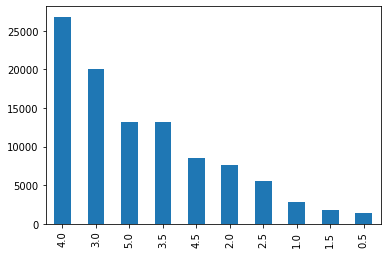

In [8]:
df['rating'].value_counts().plot(kind = 'bar')

## Dimentionality Reduction

Filtering out movies with less rating 

In [10]:
min_rating = 3
filter_movies = df['movieId'].value_counts() > min_rating
filter_movies = filter_movies[filter_movies].index.tolist()

Filtering out user with less 3 rating given

In [11]:
min_user_rating = 3
filter_users = df['userId'].value_counts() > min_user_rating
filter_users = filter_users[filter_users].index.tolist()

In [12]:
print('Original data shape:\t{}'.format(df.shape))
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print('New data shape:\t{}'.format(df.shape))

Original data shape:	(100836, 3)
New data shape:	(92394, 3)


## Creating training and test set

Creating columns for training

In [13]:
cols = ['userId', 'movieId', 'rating']

Creating surprise dataset

In [14]:
reader = Reader(rating_scale= (0.5, 5))
data= Dataset.load_from_df(df[cols], reader)

Creating training set and tesing set

In [15]:
trainset= data.build_full_trainset()
antiset= trainset.build_anti_testset()

## Creating model

SVD

In [17]:
model = SVD(n_epochs = 25, verbose = True)

In [21]:
cross_validate(model, data, measures= ['MAE', 'RMSE'], cv =5, verbose = True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

{'test_mae': array([0.65904515, 0.66220067, 0.65815426, 0.65767349, 0.66524686]),
 'test_rmse': array([0.85544066, 0.86301998, 0.85776467, 0.86120374, 0.86786446]),
 'fit_time': (3.831212043762207,
  3.5396320819854736,
  3.536994218826294,
  3.5278093814849854,
  3.600660562515259),
 'test_time': (0.1132040023803711,
  0.1119377613067627,
  0.33372068405151367,
  0.1150674819946289,
  0.11611390113830566)}

# Prediction

In [22]:
predictions = model.test(antiset)

In [24]:
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

Recommending Top 3 movies

In [35]:
from collections import defaultdict
def get_top_n(predictions, n):
    # First mmapping the prediction to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid,est))
        
    #sort the predictin foe each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse= True)
        top_n[uid]= user_ratings[:n]
    
    return top_n
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 1272, 32]
2 [2959, 858, 1136]
3 [6874, 750, 1178]
4 [527, 1262, 8014]
5 [1228, 1148, 1952]
6 [246, 908, 105504]
7 [904, 745, 318]
8 [858, 2959, 904]
9 [858, 2959, 293]
10 [260, 1272, 953]
11 [2571, 246, 750]
12 [6, 50, 260]
13 [858, 5618, 260]
14 [858, 1201, 1197]
15 [1276, 912, 904]
16 [1104, 1237, 1204]
17 [1204, 1237, 4973]
18 [1272, 1237, 3451]
19 [1204, 5617, 1203]
20 [527, 3949, 29]
21 [34405, 56782, 96821]
22 [3451, 750, 7802]
23 [527, 31658, 1204]
24 [1270, 5618, 898]
25 [50, 296, 608]
26 [2959, 177593, 1272]
27 [608, 899, 1028]
28 [1272, 953, 3037]
29 [58559, 527, 6]
30 [1136, 2959, 48516]
31 [1250, 5618, 58559]
32 [1204, 7361, 2571]
33 [4226, 5995, 899]
34 [951, 1233, 527]
35 [318, 898, 541]
36 [3578, 260, 1272]
37 [1136, 1228, 1272]
38 [5618, 1276, 1197]
39 [750, 4226, 4973]
40 [3275, 951, 908]
41 [1221, 318, 953]
42 [4973, 1104, 2762]
43 [6, 50, 101]
44 [2542, 912, 1234]
45 [527, 2542, 1251]
46 [56782, 246, 260]
47 [1248, 750, 55118]
48 [1208, 1104, 246]
49 [1104, 2